# Introduction to Convolutional Neural Networks and Computer vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as a camera in self driving car recognizing car infront of it.

## Get the data

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-06-14 02:27:33--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.195.128, 173.194.196.128, 173.194.192.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  61.8MB/s    in 1.7s    

2022-06-14 02:27:34 (61.8 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very step  at the beginning of any machine learning project is to becom one with data

And for a computer vision project... this usually means many samples of your data.

In [ ]:
!ls pizza_steak/

test  train


In [ ]:
!ls pizza_steak/train 

pizza  steak


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os
# Walkthrough pizza steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} and images in '{(dirpath)}'. ")

There are 2 directories and 0 and images in 'pizza_steak'. 
There are 2 directories and 0 and images in 'pizza_steak/test'. 
There are 0 directories and 250 and images in 'pizza_steak/test/pizza'. 
There are 0 directories and 250 and images in 'pizza_steak/test/steak'. 
There are 2 directories and 0 and images in 'pizza_steak/train'. 
There are 0 directories and 750 and images in 'pizza_steak/train/pizza'. 
There are 0 directories and 750 and images in 'pizza_steak/train/steak'. 


In [ ]:
# Another way of viewing how many images in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak")) # listdir() = list all the name in the directory

num_steak_images_train

750

To visulaize the images first lets get the class names programmatically.

In [ ]:
# Get the class name programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) #this line created a list of class names from sub directories(subdirectories in training folder)
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # set up the target directory
  target_folder = target_dir+target_class
  print(target_folder)
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  # print(img)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image Shape:{img.shape}") # show the shape of the image
  return img

pizza_steak/train/pizza
['626902.jpg']
Image Shape:(512, 384, 3)


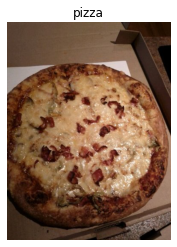

In [ ]:
# View a random image from a training dataset
img = view_random_image(target_dir ="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 86,  63,  47],
        [ 88,  65,  49],
        [ 89,  66,  50],
        ...,
        [ 36,  17,   3],
        [ 36,  17,   3],
        [ 35,  16,   2]],

       [[ 88,  65,  49],
        [ 88,  65,  49],
        [ 88,  65,  49],
        ...,
        [ 38,  19,   5],
        [ 38,  19,   5],
        [ 38,  19,   5]],

       [[ 90,  67,  51],
        [ 89,  66,  50],
        [ 88,  65,  49],
        ...,
        [ 40,  21,   7],
        [ 40,  21,   7],
        [ 41,  22,   8]],

       ...,

       [[ 56,  37,  23],
        [ 55,  36,  22],
        [ 54,  35,  21],
        ...,
        [139, 109,  98],
        [140, 110,  99],
        [140, 110,  99]],

       [[ 54,  35,  21],
        [ 56,  37,  23],
        [ 56,  37,  23],
        ...,
        [138, 108,  97],
        [140, 110,  99],
        [140, 110,  99]],

       [[ 51,  32,  18],
        [ 54,  35,  21],
        [ 56,  37,  23],
        ...,
        [139, 109,  9

In [ ]:
img.shape # returns width, height and color channels

(512, 384, 3)

In [ ]:
# Get all the pixels between 0 & 1
img/255.0

array([[[0.3372549 , 0.24705882, 0.18431373],
        [0.34509804, 0.25490196, 0.19215686],
        [0.34901961, 0.25882353, 0.19607843],
        ...,
        [0.14117647, 0.06666667, 0.01176471],
        [0.14117647, 0.06666667, 0.01176471],
        [0.1372549 , 0.0627451 , 0.00784314]],

       [[0.34509804, 0.25490196, 0.19215686],
        [0.34509804, 0.25490196, 0.19215686],
        [0.34509804, 0.25490196, 0.19215686],
        ...,
        [0.14901961, 0.0745098 , 0.01960784],
        [0.14901961, 0.0745098 , 0.01960784],
        [0.14901961, 0.0745098 , 0.01960784]],

       [[0.35294118, 0.2627451 , 0.2       ],
        [0.34901961, 0.25882353, 0.19607843],
        [0.34509804, 0.25490196, 0.19215686],
        ...,
        [0.15686275, 0.08235294, 0.02745098],
        [0.15686275, 0.08235294, 0.02745098],
        [0.16078431, 0.08627451, 0.03137255]],

       ...,

       [[0.21960784, 0.14509804, 0.09019608],
        [0.21568627, 0.14117647, 0.08627451],
        [0.21176471, 0

## An end to end example

Lets build a convolutional neural network to find patterns in our images. More specifically we need a way to:

* load our images
* Pre process our images
* Build CNN to find pattern in our images
* Compile our CNN
* Fit the CNN to our training data


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed = 42
# Get all the pixel values between 0 and 1 (this is also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed =42) # seed is for reproducability

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                               batch_size =32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed =42)

# Build a CNN model (Same as tiny VGG in CNN explainer website)
model_1 = tf.keras.models.Sequential([
                                      
        tf.keras.layers.Conv2D(filters = 10,
                               kernel_size= 3,
                               activation="relu",
                               input_shape=(224,224,3)),
        tf.keras.layers.Conv2D(10, 3, activation = "relu"),
        tf.keras.layers.MaxPool2D(pool_size= 2,
                                  padding = "valid"),
        tf.keras.layers.Conv2D(10,3, activation="relu"),
        tf.keras.layers.Conv2D(10, 3, activation="relu"),
        tf.keras.layers.MaxPool2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 107s 2s/step - loss: 0.5487 - accuracy: 0.7167 - val_loss: 0.4668 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 104s 2s/step - loss: 0.4271 - accuracy: 0.8100 - val_loss: 0.3480 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 105s 2s/step - loss: 0.4067 - accuracy: 0.8180 - val_loss: 0.3433 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 105s 2s/step - loss: 0.3649 - accuracy: 0.8440 - val_loss: 0.3081 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 106s 2s/step - loss: 0.3186 - accuracy: 0.8727 - val_loss: 0.2914 - val_accuracy: 0.8720


In [ ]:
len(train_data)

47

**If the training in neural network takes longer than 10s make sure using GPU accelerator**

In [ ]:
# Get a model simmary
model_1.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

## Using the same model as before

Lets replicate the model we built in previous section to see if its work in our image data.

In [ ]:
# Set random seed
tf.random.set_seed =42
# 1. Create a model
model_2 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(224,224,3)),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(4, activation="relu"),
        tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data =valid_data,
            validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 256ms/step - loss: 7.7422 - accuracy: 0.4920 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 246ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 297ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 14s 299ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 7.6246 - accuracy: 0.5000 - val_loss: 7.6246 - val_accuracy: 0.5000


In [ ]:
# Get a summary of model 2
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 4)                 602116    
                                                                 
 dense_15 (Dense)            (None, 4)                 20        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Trainable params are "Learnable Patterns the model can figure out during training"

In [ ]:
# Set the random seed
tf.random.sett_seed =42
# Create a model
model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(100, activation="relu"),
          tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile the mopdel
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 16s 324ms/step - loss: 3.8610 - accuracy: 0.5833 - val_loss: 0.7259 - val_accuracy: 0.7660
Epoch 2/5
47/47 [==============================] - 15s 319ms/step - loss: 0.7569 - accuracy: 0.7000 - val_loss: 0.6420 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 15s 324ms/step - loss: 0.7230 - accuracy: 0.7207 - val_loss: 0.7059 - val_accuracy: 0.6820
Epoch 4/5
47/47 [==============================] - 15s 327ms/step - loss: 0.5782 - accuracy: 0.7593 - val_loss: 0.6153 - val_accuracy: 0.7040
Epoch 5/5
47/47 [==============================] - 15s 329ms/step - loss: 0.5698 - accuracy: 0.7573 - val_loss: 0.4467 - val_accuracy: 0.8040


In [ ]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 150528)            0         
                                                                 
 dense_17 (Dense)            (None, 100)               15052900  
                                                                 
 dense_18 (Dense)            (None, 100)               10100     
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary classification: Let's break it down

1. Become one with data (Visualize, visualize, visualize)
2. Preprocess the data (Prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (Start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied(Experiment, experiment, experiment)

### 1. Become one with data

pizza_steak/train/steak
['3671877.jpg']
Image Shape:(512, 512, 3)
pizza_steak/train/pizza
['1763205.jpg']
Image Shape:(512, 512, 3)


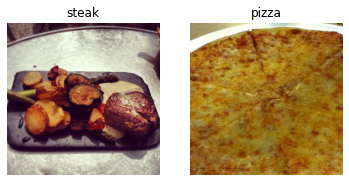

In [ ]:
# Visulaize the data
plt.figure()
plt.subplot(1,2,1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1,2,2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data(Prepare it for the model)

In [ ]:
# Define directory dataset path
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Next step is Turn our data into **batches** 

A batch is a small subset of data. Rather than looking at all "10,000" images at one time a model might look at 32 at a time. It does this for a couple of reasons.
1. 10,000 images (or more) might not fit in the memory of your processor (GPU).
2. Trying to learn pattern in 10,000 image in one hit could result in the model not being able to learn very well.

Why 32?
-> 32 is good for ur health.

In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
# Create train and test data generators and rescale the data. (Efficient ways of loading data into the memory so the neural network can find patterns into it)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255.) # Rescale is saying when u load up images divide each pixel by 255
test_datagen = ImageDataGenerator(rescale= 1/255.)

In [ ]:
# Load in our data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,     # Target directory of images
                                               target_size = (224,224), # Target size of images. (height, width)
                                               class_mode = "binary", # Target class (categorical, binary, sparse, input, none)
                                               batch_size = 32)        # size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

In [ ]:
# Get a sample of our training dataset
images, labels = train_data.next() # Next batch of images/labels in train data
len(images), len(labels)  

In [ ]:
# How many batches are there?
len(train_data) # 1500/32

In [ ]:
# Get the first 2 images
images[:1], images[0].shape

In [ ]:
images[7]

In [ ]:
# View the first batch of labels
labels

### 3. Create a CNN model (Strat with a baseline)

A baseline is a relatively simple model or existing result that you setup when u do machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> In deep learning there are almost infinit amount of architectures you could create. So, one of the best way to start is start with something simple and see if it works with ur data and introduced complexity as required.(e.g. look at which current model that working best in the field for your problem)


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Activation, MaxPool2D
from tensorflow.keras import Sequential

In [ ]:
# Lets create the model. (This will be our baseline, A three layer convolutional neural network )
model_4 = Sequential([
          Conv2D(filters= 10, # number of sliding window going across an input (the higher the complex)
                 kernel_size = 3, # the size of the sliding window
                 strides =1, # step of the sliding window 
                 padding = "valid", # valid is compress and same is same as input image means no padding
                 activation="relu",
                 input_shape=(224,224,3)), # Input Layer specify input shape
          Conv2D(10, 3, activation="relu"),
          Conv2D(10,3,activation="relu"),
          Flatten(),
          Dense(1, activation="sigmoid") # Output layer (working with binary classification so only 1 output neuron)
])

In [ ]:
# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics = ["accuracy"])


In [ ]:
# Get a summary of our model
model_4.summary()

### 4. Fit the Model

In [ ]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch =len(train_data), # go all 47 steps per epoch
                        validation_data= test_data,
                        validation_steps=len(test_data))

In [ ]:
model_1.evaluate(test_data)

In [ ]:
model_1.summary()

### 5. Evaluate our model.

It looks like our model is learning something. Lets check

In [ ]:
# Lets plot our loss curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# PLot the validation and training curves separately
def plot_loss_curves(history):
  """ Return different loss curves for training and validation metrics"""
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy= history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="validation_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy,label="validation_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history=history_4)

When a model's **validation loss** start to increasing its likely the sign of **OVERFITTING**! the training dataset. Which means its learning the pattern in training dataset too well. Thus the models ability to generalize on unseen data is diminished.

### 6. Adjust the model parameter

Fitting a machine learning model comes in 3 steps

0. Create a baseline
1. Beat the baeline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:

* Increase the number of conv layer
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:

* Add data augmentation.
* add regularization layers such as maxpool
* Add more data

* Reducing Overfitting is alos known as regularization 

In [ ]:
# Create the model (This is going to our new baseline)
model_5 = Sequential([
         Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
         MaxPool2D(pool_size=2),
         Conv2D(10,3,activation="relu"),
         MaxPool2D(2),
         Conv2D(10,3,activation="relu"),
         MaxPool2D(2),
         Flatten(),
         Dense(1,activation="sigmoid")
])


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer= Adam(),
                metrics = ["accuracy"])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs =5,
                        steps_per_epoch =len(train_data),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 54s 1s/step - loss: 0.5881 - accuracy: 0.6800 - val_loss: 0.4709 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 52s 1s/step - loss: 0.4575 - accuracy: 0.7900 - val_loss: 0.3642 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.4132 - accuracy: 0.8120 - val_loss: 0.3575 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 52s 1s/step - loss: 0.3863 - accuracy: 0.8360 - val_loss: 0.3316 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 56s 1s/step - loss: 0.3596 - accuracy: 0.8447 - val_loss: 0.3053 - val_accuracy: 0.8580


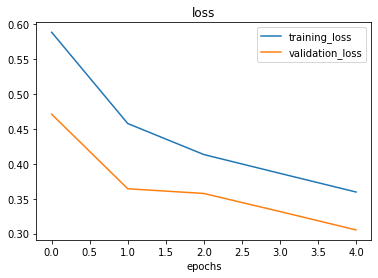

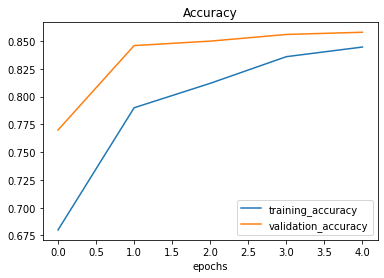

In [ ]:
# Plot Loss curve
plot_loss_curves(history=history_5)

In [ ]:
# Get a summary of model with maxpooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # How much u want to rotate an image
                                             shear_range=0.2, # how much shearing u want (shear a sheep)
                                             zoom_range =0.2,
                                             width_shift_range=0.2, # Moved to the left (x axis)
                                             height_shift_range=0.3, # moved to the y-axis
                                             horizontal_flip=True) # do u want to flip an image

# Create Image Data generator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create image data generator without augmentation for test set
test_datagen = ImageDataGenerator(rescale=1/255.)

Data augmentation is the process of altering training data, leading it to move more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of images, flipping it, cropping it or doing something similar. 

In [ ]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224,224),
                                                                   batch_size=32, class_mode='binary',
                                                                   shuffle=False) #Demo purpose only

# Create a non augmented train data batches
print("Non Augmented data")
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               batch_size=32,class_mode="binary",
                                               shuffle=False)
IMG_SIZE=(224,224)
# Non augmented test data
print('Unchanged test data')
test_data = test_datagen.flow_from_directory(test_dir, target_size=IMG_SIZE, batch_size=32, class_mode='binary')



Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented data
Found 1500 images belonging to 2 classes.
Unchanged test data
Found 500 images belonging to 2 classes.


Data Augmentation is usually only performed on training data. Using `ImageDataGenerator` built in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded to the model

Finally lets visualize some augmented data

In [ ]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # Note: labels aren't augmented, they stay the same

Random image no: 22


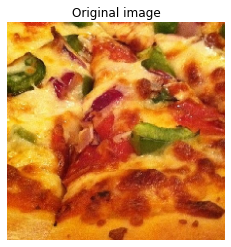

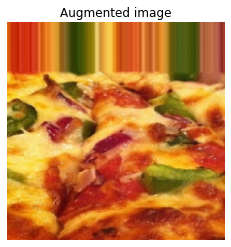

In [ ]:
# Show original image and augmented image
random_number = random.randint(0, 32) # we're making batches of size 32, so we'll get a random instance
print(f'Random image no: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Now we have seen how augmented training data looks like, lets build a model to see  how its learn on augmented data


In [ ]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 69s 1s/step - loss: 0.8078 - accuracy: 0.4747 - val_loss: 0.6806 - val_accuracy: 0.5980
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.6870 - accuracy: 0.5013 - val_loss: 0.6672 - val_accuracy: 0.6420
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.6952 - accuracy: 0.5133 - val_loss: 0.6564 - val_accuracy: 0.6580
Epoch 4/5
47/47 [==============================] - 66s 1s/step - loss: 0.6688 - accuracy: 0.5807 - val_loss: 0.6157 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.6892 - accuracy: 0.5853 - val_loss: 0.6322 - val_accuracy: 0.7040


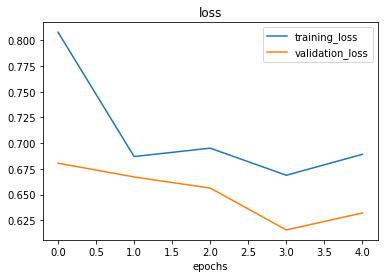

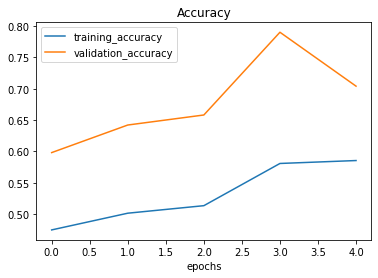

In [ ]:
# Check Model training curves
plot_loss_curves(history_6)

Lets shuffle our augmented training data and train another model and see what happens.

In [ ]:
# Import data augment it and shuffle it from training directory
print('Augmented training data Shuffled')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                target_size=(224,224),
                                                                batch_size=32,
                                                                class_mode='binary',
                                                                shuffle=True)


Augmented training data Shuffled
Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (Same as model 5 & 6)
model_7 = Sequential([
                  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                  MaxPool2D(pool_size=2),
                  Conv2D(10,3,activation="relu"),
                  MaxPool2D(),
                  Conv2D(10,3,activation="relu"),
                  MaxPool2D(),
                  Flatten(),
                  Dense(1,activation="sigmoid")
])
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 71s 1s/step - loss: 0.6645 - accuracy: 0.5833 - val_loss: 0.6183 - val_accuracy: 0.6080
Epoch 2/5
47/47 [==============================] - 67s 1s/step - loss: 0.5995 - accuracy: 0.6627 - val_loss: 0.4788 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 67s 1s/step - loss: 0.5274 - accuracy: 0.7353 - val_loss: 0.4612 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 67s 1s/step - loss: 0.5164 - accuracy: 0.7500 - val_loss: 0.4036 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 66s 1s/step - loss: 0.4872 - accuracy: 0.7707 - val_loss: 0.3628 - val_accuracy: 0.8520


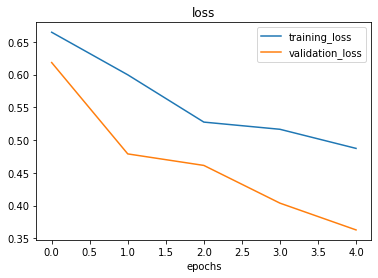

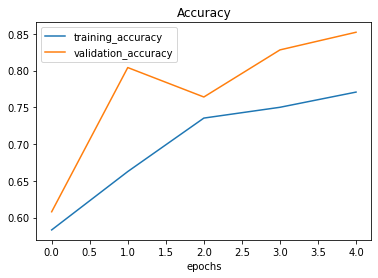

In [ ]:
# Plot the loss cuves (model_7)
plot_loss_curves(history_7)

When shuffling training data the model gets exposed to all different kind of dataduring training.Thus enabling it to learn features from wide array of images.(Instead of just pizza and then steak)

### 7. Repeat until Satisfied

Since we have already beaten our beseline, there are a few things we can do to improve to improve our model.
* Increase the number of model layers (i.e. `COnv2D` and `MaxPool2D`)
* Increase the number of filters in each convolutional layers (i.e. from 10 to 32 or 64)
* Train it for longer
* Use ideal learning rate
* Get more data
*Use `transfer learning` to leverage another image model has learned and adjust it for our own usecase

 Recreating CNN explainer (i.e. model_1) with shuffled data


In [ ]:
# Create the model
model_8 = Sequential([
          Conv2D(15, 3, activation="relu"),
          Conv2D(15,3,activation="relu"),
          MaxPool2D(pool_size=2),
          Conv2D(15,3,activation="relu"),
          Conv2D(15,3,activation="relu"),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation="sigmoid")

])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data= test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 168s 4s/step - loss: 0.6637 - accuracy: 0.6013 - val_loss: 0.4814 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 166s 4s/step - loss: 0.5414 - accuracy: 0.7307 - val_loss: 0.4467 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 170s 4s/step - loss: 0.5157 - accuracy: 0.7527 - val_loss: 0.4213 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 167s 4s/step - loss: 0.5098 - accuracy: 0.7580 - val_loss: 0.3778 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 167s 4s/step - loss: 0.4821 - accuracy: 0.7780 - val_loss: 0.3723 - val_accuracy: 0.8580


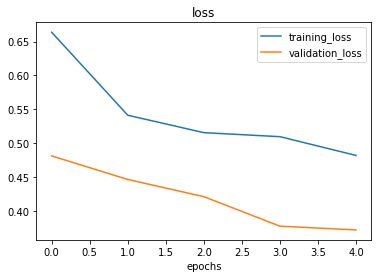

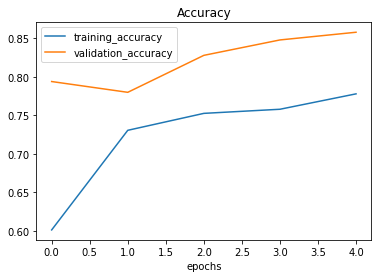

In [ ]:
plot_loss_curves(history_8)

### Making a prediction with our own custom data

In [ ]:
# class names
print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image
import matplotlib.image as mpig
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpig.imread('03-steak.jpeg')

--2022-06-14 02:27:36--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-06-14 02:27:37 (32.6 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



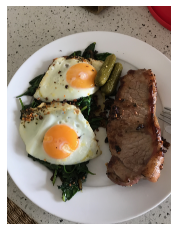

In [ ]:
# View the image
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the sahpe of our image
steak.shape

(4032, 3024, 3)

When u train a neural network and want to make preiction with it on your own custom data, its important that your own custom data is preprocessed into the same format as your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to used with our own model.
def load_and_prep_image(filename, img_shape=224):
  """
  Read a custom image and reshape it into (img_shape, img_shape, color_channel)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  #Decode read file into tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image(filename="03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
expanded_steak = tf.expand_dims(steak,axis=0)

In [ ]:
pred = model_7.predict(expanded_steak)
pred

array([[0.84409577]], dtype=float32)

Looks like our custom image is being put through our model, However, it currently outputs a prediction probability. We want to visualize the image along with its probability

In [ ]:
# Remind ourselves our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding up the prediction probability 
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  imports an image located at filename, makes a prediction with model and plots the image with predicted class as the title
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction {pred_class}")
  plt.axis(False);

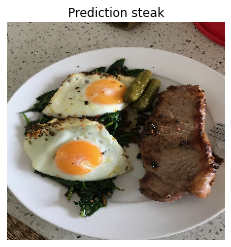

In [ ]:
# Test our model in custom image
pred_and_plot(model_7, "03-steak.jpeg")

--2022-06-14 02:37:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-06-14 02:37:42 (43.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



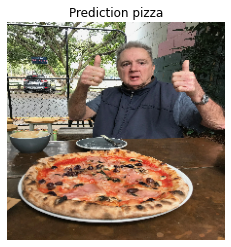

In [ ]:
# Download another test custom image and test
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, filename="03-pizza-dad.jpeg")

# Multiclass image classification

1. Become One with the data
2. Pre process the data (Get it ready for a model)
3. Create the model (Start with the basemodel)
4. Fit the model (Overfit it to make sure it works)
5. Evaluate the model
6. Adjust different types of hyperparameters and improve. (try to beat baseline/reduce overfitting).
7. Repeat until satisfaction

In [ ]:
## Import and become one with data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-06-14 02:37:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 142.250.103.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   152MB/s    in 3.4s    

2022-06-14 02:37:46 (148 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
# Unzip the data
zfile = zipfile.ZipFile('10_food_classes_all_data.zip', 'r') 
zfile.extractall()
zfile.close()

In [ ]:
import os

# Walkthrough our images 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

There are 2 directories and 0 in 10_food_classes_all_data
There are 10 directories and 0 in 10_food_classes_all_data/test
There are 0 directories and 250 in 10_food_classes_all_data/test/fried_rice
There are 0 directories and 250 in 10_food_classes_all_data/test/chicken_curry
There are 0 directories and 250 in 10_food_classes_all_data/test/chicken_wings
There are 0 directories and 250 in 10_food_classes_all_data/test/pizza
There are 0 directories and 250 in 10_food_classes_all_data/test/sushi
There are 0 directories and 250 in 10_food_classes_all_data/test/steak
There are 0 directories and 250 in 10_food_classes_all_data/test/ramen
There are 0 directories and 250 in 10_food_classes_all_data/test/hamburger
There are 0 directories and 250 in 10_food_classes_all_data/test/grilled_salmon
There are 0 directories and 250 in 10_food_classes_all_data/test/ice_cream
There are 10 directories and 0 in 10_food_classes_all_data/train
There are 0 directories and 750 in 10_food_classes_all_data/train

In [ ]:
# Setup the training and testing directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Lets get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
# print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
random.choice(class_names)

'chicken_curry'

10_food_classes_all_data/train/ramen
['766702.jpg']
Image Shape:(512, 512, 3)


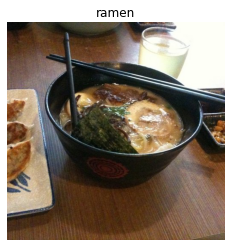

In [ ]:
# VIsualize Visualiza, Visulaize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocessing Data

In [ ]:
# Create Image datagenerator instances
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale the image data
train_datagen_mul = ImageDataGenerator(rescale=1/255.)
test_datagen_mul = ImageDataGenerator(rescale= 1/255.)

In [ ]:
# Now apply the instances and load them in from directories and turn it into batches
train_data_mul = train_datagen_mul.flow_from_directory(train_dir,
                                                       target_size=(224,224),
                                                       batch_size=32,
                                                       class_mode= 'categorical')

test_data_mul = test_datagen_mul.flow_from_directory(test_dir,
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode='categorical')

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### 3. Creating a baseline model

In [ ]:
# 1. Creating a baseline model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_9 = Sequential([
          Conv2D(10, 3, input_shape=(224,224,3), activation="relu"),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(pool_size=2),
          Conv2D(10,3,activation="relu"),
          Conv2D(10,3, activation="relu"),
          MaxPool2D(),
          Flatten(),
          Dense(10, activation="softmax")
])

# 2. Compile the model
model_9.compile(loss = "categorical_crossentropy",
                optimizer = Adam(),
                metrics=["accuracy"])

# 3. Fit the model
history_9 = model_9.fit(train_data_mul, 
                        epochs=5,
                        steps_per_epoch= len(train_data_mul),
                        validation_data = test_data_mul,
                        validation_steps = len(test_data_mul))

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
len(test_data_mul)

### 5. Evaluate the model

In [ ]:
#Lets Evaluate
model_9.evaluate(test_data_mul)

In [ ]:
# check the model's loss curve
plot